<a href="https://colab.research.google.com/github/Patrick-Setubal/Data_Science_Analytics/blob/main/puc/sprint2/VisaoComputacional/Sprint2_VisaoComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema

**Problema de Visão computacional**

Objetivo: Treinar um modelo que consiga diferenciar as minhas 2 cachorras (Maeve e Amora)
Dataset: 500 Fotos da Maeve e 500 Fotos da amora retiradas com o celular.

# Importando os dados

In [61]:
# Importando bibliotecas
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Importanto Imagens da amora e da maeve
path_amora = '/content/drive/MyDrive/Codigos/Pos PUC/Sprint 2/Dataset_Sprint2_VisaoComputacional/Amora Fotos/'
path_maeve = '/content/drive/MyDrive/Codigos/Pos PUC/Sprint 2/Dataset_Sprint2_VisaoComputacional/Maeve Fotos/'
amora_img_name = [path_amora + name for name in os.listdir(path_amora)]
maeve_img_name = [path_maeve + name for name in os.listdir(path_maeve)]

# Criando
df_amora = pd.DataFrame({'imagem': amora_img_name, 'class': 1, 'name': 'amora'})
df_maeve = pd.DataFrame({'imagem': maeve_img_name, 'class': 0, 'name': 'maeve'})

df = pd.concat([df_amora, df_maeve],ignore_index=True)

Quantidade de Imagens da Amora e da Maeve
amora    500
maeve    500
Name: name, dtype: int64


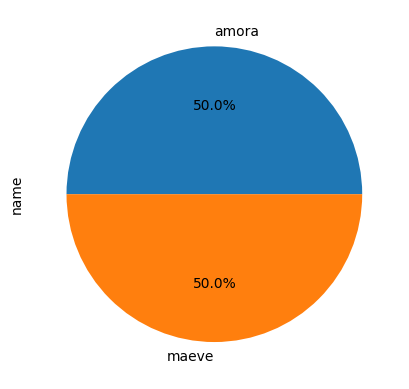

In [84]:
# Print da comparação das classes
print('Quantidade de Imagens da Amora e da Maeve')
print((df['name']).value_counts())

# Plotar Grafico de Pizza
df_pie_class = df['name'].value_counts().plot.pie(autopct='%1.1f%%')

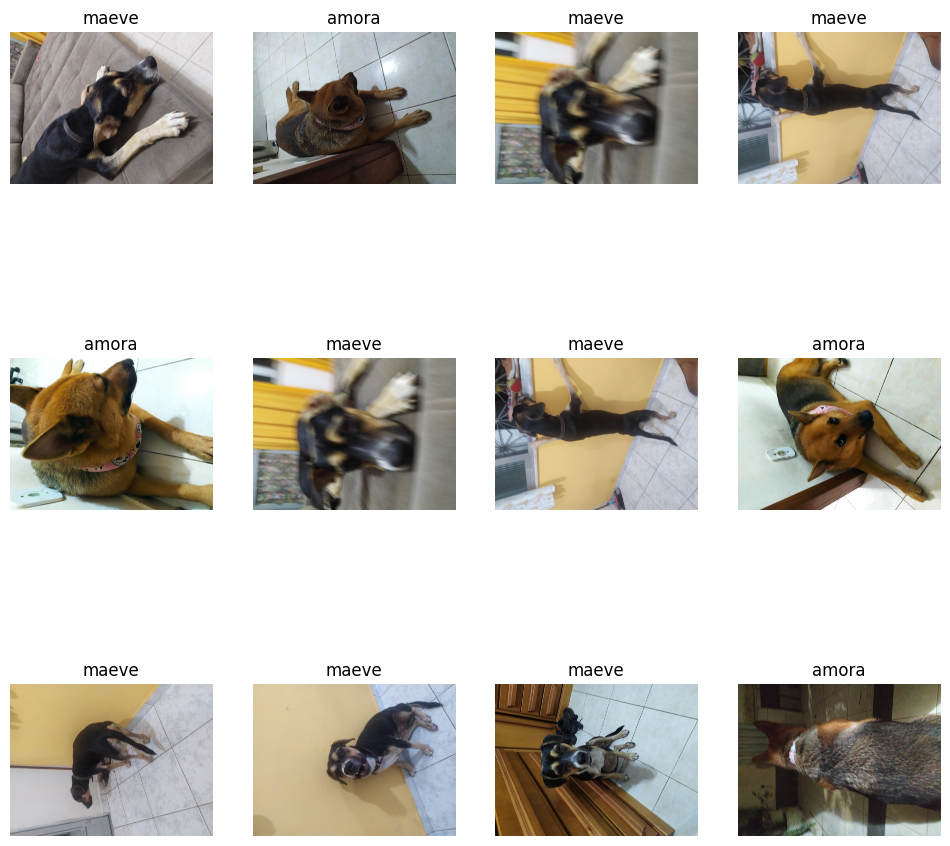

In [85]:
# Exibir 12 imagens aleatorias
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)

# Visualizando apenas 12 imagens
for i in range(12):
  # Devinir um index randomicamente
  random_index = random.randint(0, len(df['imagem'])-1)
  img_path = df['imagem'].iloc[random_index]
  sp = plt.subplot(3, 4, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(df['name'].iloc[random_index])

plt.show()


In [ ]:
https://colab.research.google.com/github/glaucio1973/mvp/blob/master/cats_vs_dogs_binaryclassify_um_unico_diretorio_dl.ipynb#scrollTo=57fdc7fb